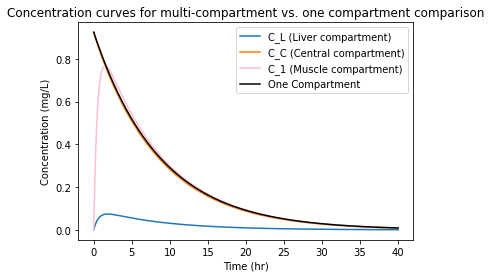

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math


# Define the parameters
Q = 300
V_A = 0  # We assume a volume for the absorption compartment; this won't affect concentration profiles
V_GI = 60 * 70 * 0.077 # L
V_L = 60 * 70 * 0.031  # L
#V_D = 25.69  # L
V_C = 60 * 70 * 0.103  # L
Q_GI = Q * 0.19  # L/hr
Q_L = Q * 0.065 # L/hr
k_a = 0.4  # /hr
k_e = 0.9 # /hr
k_ec = 0.693/ 6 # /hr

dose = 400  # mg
Q_1 = Q * 0.17
V_1 = 25.69

# Initial concentrations (mg/L)
#C_A0 = dose / V_A  # The initial condition for the absorption compartment is the dose divided by V_A
C_A0 = 0
C_C0 = dose / V_C
initial_conditions = [C_A0, 0, 0, C_C0, 0]  # C_A, C_GI, C_L, C_C, C_1

# Time vector (24 hrs)
t = np.linspace(0, 40, 7500)

# System of ODEs
def model(t, y):
    C_A, C_GI, C_L, C_C, C_1 = y
    dC_A_dt = -k_a * C_A
    dC_GI_dt = k_a * C_A - Q_GI * C_GI/V_GI
    dC_L_dt = (Q_GI * C_GI)/V_L - ((Q_L + Q_GI) * C_L)/V_L + (Q_L * C_C)/V_L - k_e * C_L
    dC_C_dt = (Q_L + Q_GI) * C_L/V_C - (Q_L * C_L)/V_C - (Q_GI * C_C)/V_C
    dC_1_dt = (Q_1)/V_1 * (C_C - C_1)

    return [dC_A_dt, dC_GI_dt, dC_L_dt, dC_C_dt, dC_1_dt]



C_1 = []
for i in range(len(t)):
    C_standin = C_C0 * math.exp(-1* k_ec * t[i])
    C_1.append(C_standin)
    

# Solve ODE
solution = solve_ivp(model, [t[0], t[-1]], initial_conditions, t_eval=t)
min_concentration = 1e-6
solution.y = np.maximum(solution.y, min_concentration)  # Set any negative concentrations to 0


#solution_2 = solve_ivp(model_1c, [t[0], t[-1]], ic1, t_eval=t)

# Plot the results
#plt.plot(solution.t, solution.y[0], label='C_A (absorption compartment)')
#plt.plot(solution.t, solution.y[1], label='C_GI (GI compartment)')
plt.plot(solution.t, solution.y[2], label='C_L (Liver compartment)')
plt.plot(solution.t, solution.y[3], label='C_C (Central compartment)')
plt.plot(solution.t, solution.y[4], color = 'pink', label='C_1 (Muscle compartment)')
plt.plot(t, C_1, color = 'black', label='One Compartment')
plt.title('Concentration curves for multi-compartment vs. one compartment comparison')
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (mg/L)')
#plt.yscale('log')
plt.legend()
plt.grid(False)
plt.show()



https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6267518/#:~:text=Liver%20is%20very%20efficient%20at,decrease%20the%20propofol%20metabolic%20rate.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3608455/#B51

https://www.ncbi.nlm.nih.gov/books/NBK430884/#:~:text=Half%2Dlife%3A%20Propofol%20is%20bi,is%20much%20shorter%20in%20duration.

https://itis.swiss/virtual-population/tissue-properties/database/density/

https://www.accessdata.fda.gov/drugsatfda_docs/label/2017/019627s066lbl.pdf